# Changing weights can improve accuracy 
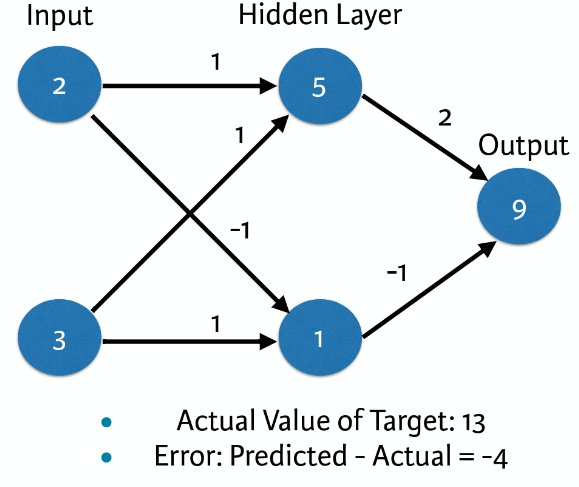

Now changing the output weight,
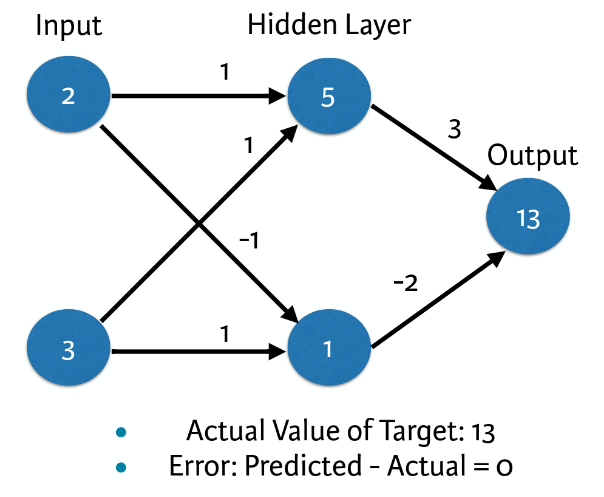

In [11]:
# without the activation function
import numpy as np
weights = { 'node_0': np.array([1,1]),
            'node_1': np.array([-1, 1]),
            'output': np.array([2,-1])}

input_data = np.array([2,3])
target = 13
# Calculate node 0 value: node_0_value
node_0_value = (weights['node_0'] * input_data).sum()

# Calculate node 1 value: node_1_value
node_1_value = (weights['node_1'] * input_data).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (weights['output'] * hidden_layer_outputs).sum()
error = output - target
# Print output
print(error)

-4


In [6]:
import numpy as np

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)

    # Return the value just calculated
    return(output)
def predict_with_network(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate model output: model_output
    model_output = (hidden_0_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)


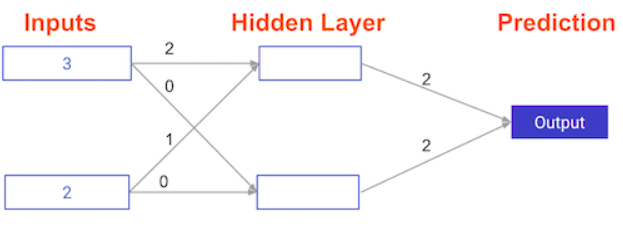

In [15]:
# solve the diagram above using relu
weights = { 'node_0': np.array([2,0]),
            'node_1': np.array([1, 0]),
            'output': np.array([2,2])}

input_data = np.array([3,2])

# The actual target value, used to calculate the error
target_actual = 5

# Make prediction using original weights
model_output = predict_with_network(input_data, weights)

# Calculate error: error
error = model_output - target_actual


# Print error & outout
print(model_output)
print(error)


18
13


In [16]:
# changing the node_o output 2.01 
weights = { 'node_0': np.array([2,0]),
            'node_1': np.array([1, 0]),
            'output': np.array([2.01,2])}

input_data = np.array([3,2])

# The actual target value, used to calculate the error
target_actual = 5

# Make prediction using original weights
model_output = predict_with_network(input_data, weights)

# Calculate error: error
error = model_output - target_actual


# Print error & outout
print(model_output)
print(error) # loses accuracy

18.06
13.059999999999999


Now you'll get to change weights in a real network and see how they affect model accuracy!
Have a look at the following neural network:
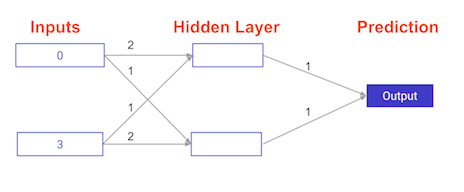

Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).
Use a pen and paper if necessary to experiment with different combinations. You'll use the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.
INSTRUCTIONS

Create a dictionary of weights called weights_1 where you have changed 1 weight from weights_0 (You only need to make 1 edit to weights_0 to generate the perfect prediction).
Obtain predictions with the new weights using the predict_with_network() function with input_data and weights_1.
Calculate the error for the new weights by subtracting target_actual from model_output_1.


In [17]:

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             # changed node_1 weight as [1,0]
             'node_1': [1, 0],
             'output': [1,1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


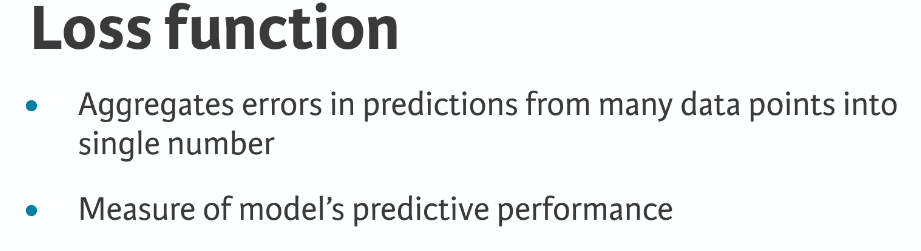
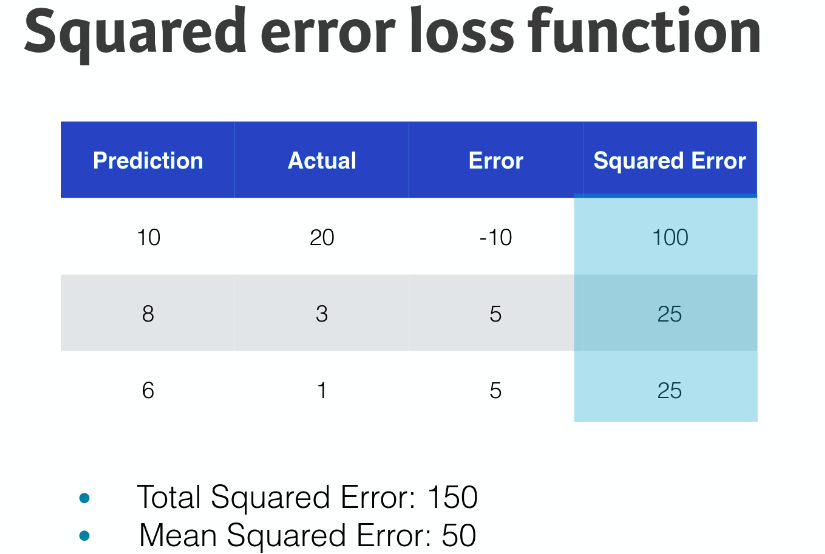
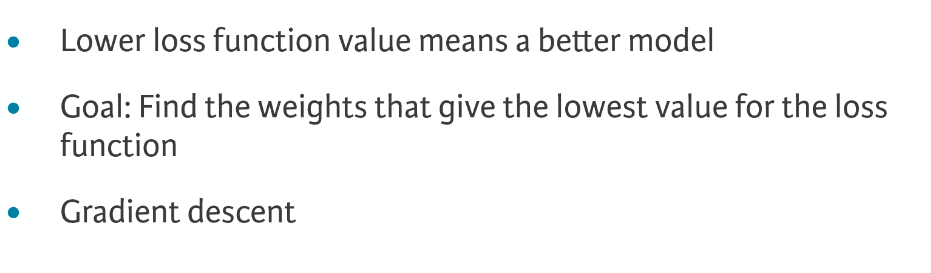

Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.
input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.
In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.
You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.
INSTRUCTIONS

Import mean_squared_error from sklearn.metrics.
Using a for loop to iterate over each row of input_data:
Make predictions for each row with weights_0 using the predict_with_network() function and append it to model_output_0.
Do the same for weights_1, appending the predictions to model_output_1.
Calculate the mean squared error of model_output_0 and then model_output_1 using the mean_squared_error() function. The first argument should be the actual values (target_actuals), and the second argument should be the predicted values (model_output_0 or model_output_1).

In [22]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 ={'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}

In [23]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625
